Even though the CF is being tracked well - there's an issue with estimating the duration of the FM. Perhaps the way to do this is through frequency tracking in time?

In [1]:
import sys
sys.path.append('../measure_horseshoe_bat_calls/')

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
from measure_a_horseshoe_bat_call import *

In [3]:
import pywt as pywt

In [4]:
fs = 250000
fmdurn = 0.001
call_durn = 0.02
call = make_one_CFcall(call_durn, fmdurn, 100000, fs, 'staplepin', fm_bandwidth=10000)
call *= 0.1
gap = int(0.005*fs)
call_w_noise = np.random.normal(0,10**-1/20,call.size+2*gap)
call_w_noise[gap:-gap] += call

fm1_startstop = [gap+1, gap+1+int(fmdurn*fs)]
fm2_startstop = [call_w_noise.size-gap-int(fmdurn*fs), call_w_noise.size-gap]
cf_startstop = [gap+int(fmdurn*fs),call_w_noise.size-gap-int(fmdurn*fs)]

../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)


In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


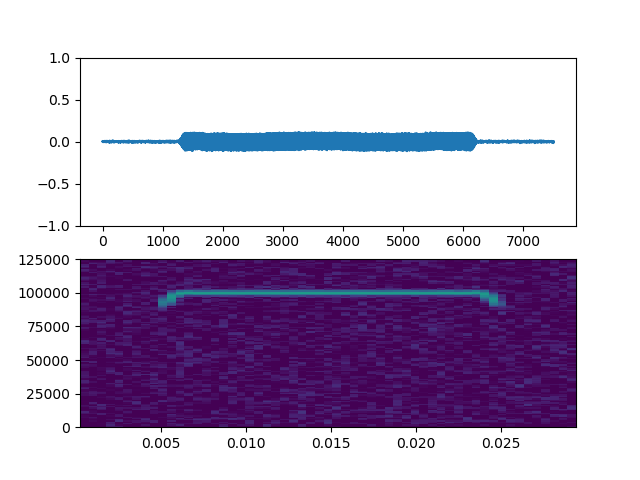

In [6]:
plt.figure()
plt.subplot(211)
plt.plot(call_w_noise)
plt.ylim(-1,1)
plt.subplot(212)
plt.specgram(call_w_noise, Fs=fs, vmax=-20, vmin=-100);

In [7]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [8]:
upsample_factor = 10
upsampled_sound = signal.resample(call_w_noise,call_w_noise.size*upsample_factor);

C:\Users\tbeleyur\Anaconda2\envs\hbc\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\tbeleyur\Anaconda2\envs\hbc\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\tbeleyur\Anaconda2\envs\hbc\lib\site-packages\scipy\signal\signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

[101562.5         67708.33333333  16927.08333333]


<IPython.core.display.Javascript object>


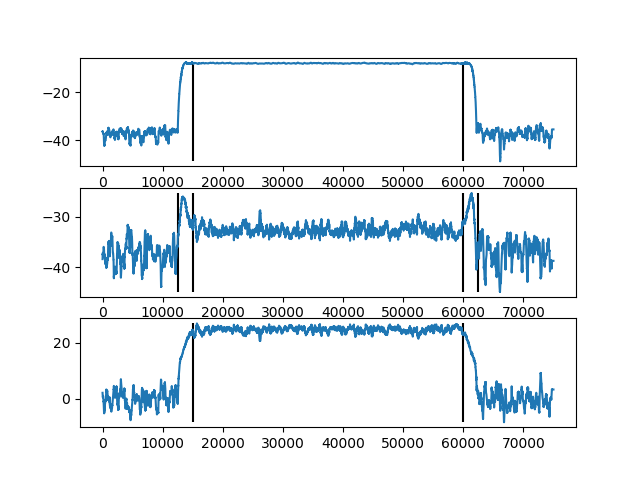

In [9]:
wavelet_type = pywt.ContinuousWavelet('morl')
[coefs, freqs] = pywt.cwt(upsampled_sound, [20, 30, 120], wavelet_type, 1.0/(upsample_factor*fs))
print(freqs)
#plt.figure()
#plt.imshow(coefs, aspect='auto')

all_scales_rms = dB(np.apply_along_axis( moving_rms, 1, coefs , window_size=250))

plt.figure()
plt.subplot(311)
plt.plot(all_scales_rms[0,:])
plt.vlines(np.array(cf_startstop)*upsample_factor, np.min(all_scales_rms[0,:]), np.max(all_scales_rms[0,:]) )
plt.subplot(312)
plt.plot(all_scales_rms[1,:])
plt.vlines(np.concatenate((fm1_startstop, fm2_startstop))*upsample_factor, np.min(all_scales_rms[1,:]),
                                                                               np.max(all_scales_rms[1,:]) )
plt.subplot(313)
diff = all_scales_rms[0,:]-all_scales_rms[1,:]
plt.plot(diff)
plt.vlines(np.array(cf_startstop)*upsample_factor, np.min(diff), np.max(diff) )


<IPython.core.display.Javascript object>


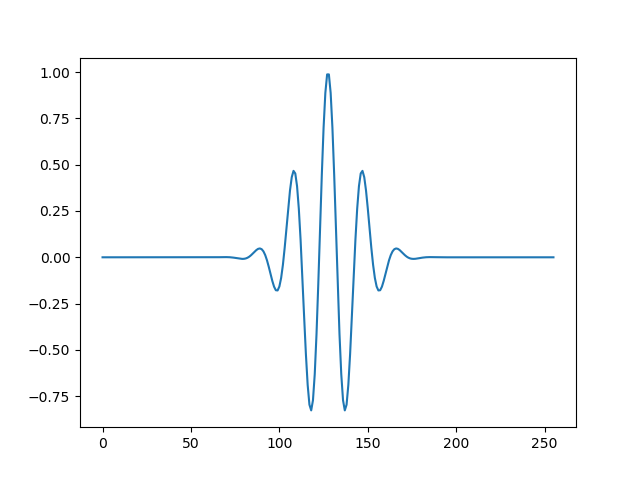

In [10]:
plt.figure()
a,b = wavelet_type.wavefun()
plt.plot(a)

<IPython.core.display.Javascript object>


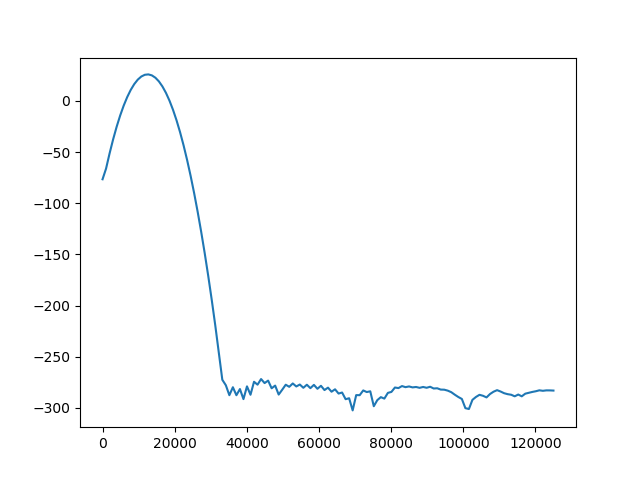

In [11]:
plt.figure()
p, f = get_power_spectrum(a,fs=250000)
plt.plot(f,p)